<a href="https://www.kaggle.com/code/lalit7881/retail-store-sales-ml-models-accuracy-80-10?scriptVersionId=295962346" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/store-sales/store_sales.csv


## Title:
Retail Store Sales Dataset

## Description:
This dataset contains structured sales data from a retail store, capturing daily transactional activity across multiple product categories. It includes information such as sales volume, revenue, product types, pricing, and time-based attributes that help track store performance and customer purchasing patterns.

The dataset is designed to support sales analysis, demand forecasting, and business performance evaluation. It can be used to identify top-selling products, seasonal trends, revenue fluctuations, and the impact of pricing or promotions on sales. Analysts and students can apply this data for data visualization, statistical analysis, and machine learning models such as sales prediction and inventory optimization.

Overall, the Retail Store Sales dataset is ideal for retail analytics, business intelligence dashboards, and decision-making insights aimed at improving operational efficiency and profitability.

## Import dataset

In [2]:
df = pd.read_csv("/kaggle/input/store-sales/store_sales.csv")

In [3]:
df.head()

,CustomerID,Age,Gender,Category,ItemPurchased,Amount,Season,PaymentMethod,ItemRating,DiscountApplied(%),PreviousPurchases
0,1,58,Female,Accessories,Handbag,115.50,Autumn,Card,3.5,18,4
1,2,40,Male,Mens Clothing,Shirt,103.43,Spring,Card,4.1,13,4
2,3,66,Female,Sports,Football,35.45,Spring,Card,3.3,11,3
3,4,39,Female,Accessories,Handbag,153.31,Spring,Card,4.4,13,4
4,5,23,Female,Home,Curtains,151.43,Winter,Card,4.1,20,10


In [4]:
df.tail()

,CustomerID,Age,Gender,Category,ItemPurchased,Amount,Season,PaymentMethod,ItemRating,DiscountApplied(%),PreviousPurchases
4995,4996,44,Female,Accessories,Sunglasses,172.64,Winter,Card,3.6,20,5
4996,4997,59,Male,Groceries,Beverages,54.00,Spring,Cash on Delivery,3.8,14,2
4997,4998,41,Female,Accessories,Handbag,159.33,Autumn,Card,4.3,26,8
4998,4999,63,Female,Womens Clothing,Skirt,173.82,Autumn,Card,4.8,26,8
4999,5000,41,Female,Footwear,Sandals,55.39,Autumn,Cash on Delivery,4.1,19,7


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerID          5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Gender              5000 non-null   object 
 3   Category            5000 non-null   object 
 4   ItemPurchased       5000 non-null   object 
 5   Amount              5000 non-null   float64
 6   Season              5000 non-null   object 
 7   PaymentMethod       5000 non-null   object 
 8   ItemRating          5000 non-null   float64
 9   DiscountApplied(%)  5000 non-null   int64  
 10  PreviousPurchases   5000 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 429.8+ KB


In [6]:
df.describe()

,CustomerID,Age,Amount,ItemRating,DiscountApplied(%),PreviousPurchases
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,45.224800,285.090522,3.784160,14.983600,5.008800
std,1443.520003,14.564995,551.454382,0.681796,5.988063,2.194285
min,1.000000,20.000000,5.080000,1.100000,0.000000,0.000000
25%,1250.750000,33.000000,70.547500,3.300000,11.000000,3.000000
50%,2500.500000,45.000000,122.485000,3.800000,15.000000,5.000000
75%,3750.250000,58.000000,184.535000,4.300000,19.000000,6.000000
max,5000.000000,70.000000,2997.940000,5.000000,36.000000,13.000000


In [7]:
df.dtypes

CustomerID              int64
Age                     int64
Gender                 object
Category               object
ItemPurchased          object
Amount                float64
Season                 object
PaymentMethod          object
ItemRating            float64
DiscountApplied(%)      int64
PreviousPurchases       int64
dtype: object

In [8]:
df.shape

(5000, 11)

In [9]:
df.isnull().sum()

CustomerID            0
Age                   0
Gender                0
Category              0
ItemPurchased         0
Amount                0
Season                0
PaymentMethod         0
ItemRating            0
DiscountApplied(%)    0
PreviousPurchases     0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.nunique()

CustomerID            5000
Age                     51
Gender                   2
Category                 9
ItemPurchased           30
Amount                4565
Season                   4
PaymentMethod            2
ItemRating              39
DiscountApplied(%)      32
PreviousPurchases       14
dtype: int64

In [12]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Category', 'ItemPurchased', 'Amount',
       'Season', 'PaymentMethod', 'ItemRating', 'DiscountApplied(%)',
       'PreviousPurchases'],
      dtype='object')

## Data visualizations

## Feature engg

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [14]:
le = LabelEncoder()

categorical_cols = [
    'Gender', 'Category', 'ItemPurchased',
    'Season', 'PaymentMethod'
]

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [15]:
X = df.drop(columns=['Gender', 'CustomerID'])
y = df['Gender']


In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [17]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [19]:
y_pred = model.predict(X_test)

In [20]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=7),
    "SVM": SVC()
}


Model: Logistic Regression
Accuracy: 64.40%

              precision    recall  f1-score   support

      Normal       0.64      0.67      0.65       501
        Risk       0.65      0.62      0.64       499

    accuracy                           0.64      1000
   macro avg       0.64      0.64      0.64      1000
weighted avg       0.64      0.64      0.64      1000



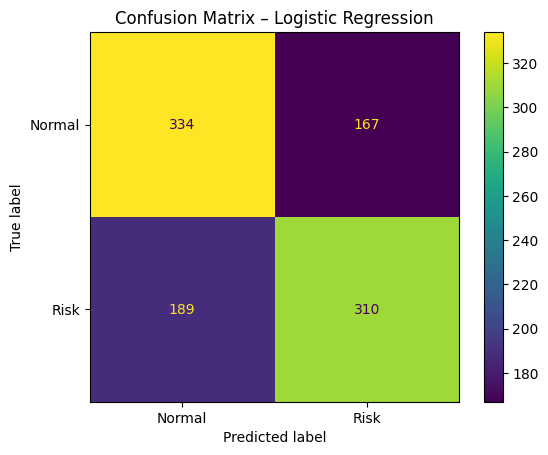


Model: Decision Tree
Accuracy: 76.60%

              precision    recall  f1-score   support

      Normal       0.74      0.81      0.78       501
        Risk       0.79      0.72      0.75       499

    accuracy                           0.77      1000
   macro avg       0.77      0.77      0.77      1000
weighted avg       0.77      0.77      0.77      1000



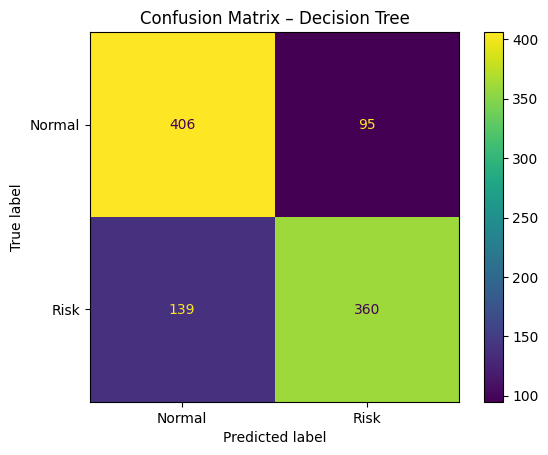


Model: Random Forest
Accuracy: 80.10%

              precision    recall  f1-score   support

      Normal       0.82      0.77      0.79       501
        Risk       0.78      0.84      0.81       499

    accuracy                           0.80      1000
   macro avg       0.80      0.80      0.80      1000
weighted avg       0.80      0.80      0.80      1000



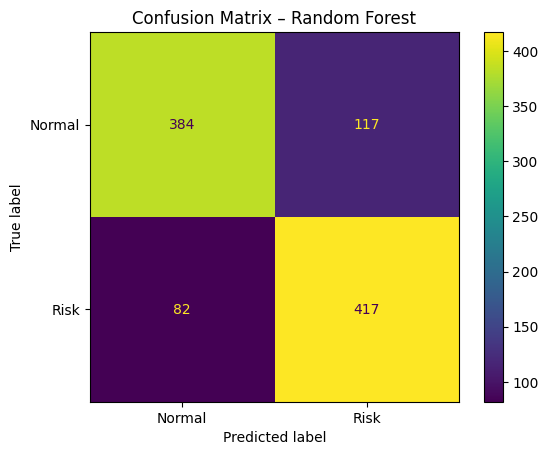


Model: KNN
Accuracy: 69.80%

              precision    recall  f1-score   support

      Normal       0.72      0.64      0.68       501
        Risk       0.68      0.75      0.71       499

    accuracy                           0.70      1000
   macro avg       0.70      0.70      0.70      1000
weighted avg       0.70      0.70      0.70      1000



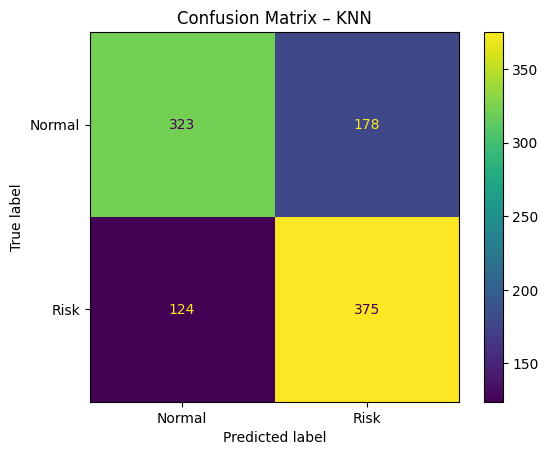


Model: SVM
Accuracy: 79.70%

              precision    recall  f1-score   support

      Normal       0.96      0.62      0.75       501
        Risk       0.72      0.97      0.83       499

    accuracy                           0.80      1000
   macro avg       0.84      0.80      0.79      1000
weighted avg       0.84      0.80      0.79      1000



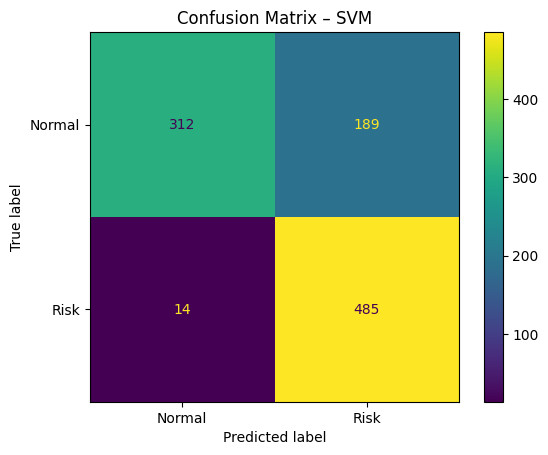

In [21]:
accuracy_results = {}

for name, model in models.items():
    print("\n==============================")
    print(f"Model: {name}")
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred) * 100
    accuracy_results[name] = acc
    
    print(f"Accuracy: {acc:.2f}%\n")
    print(classification_report(y_test, y_pred, target_names=["Normal", "Risk"]))
    
    cm = confusion_matrix(y_test, y_pred, labels=[0,1])
    disp = ConfusionMatrixDisplay(
        confusion_matrix=cm,
        display_labels=["Normal", "Risk"]
    )
    disp.plot()
    plt.title(f"Confusion Matrix – {name}")
    plt.show()

In [22]:
print("\nFINAL MODEL ACCURACY (%)")
for model, acc in accuracy_results.items():
    print(f"{model}: {acc:.2f}%")


FINAL MODEL ACCURACY (%)
Logistic Regression: 64.40%
Decision Tree: 76.60%
Random Forest: 80.10%
KNN: 69.80%
SVM: 79.70%


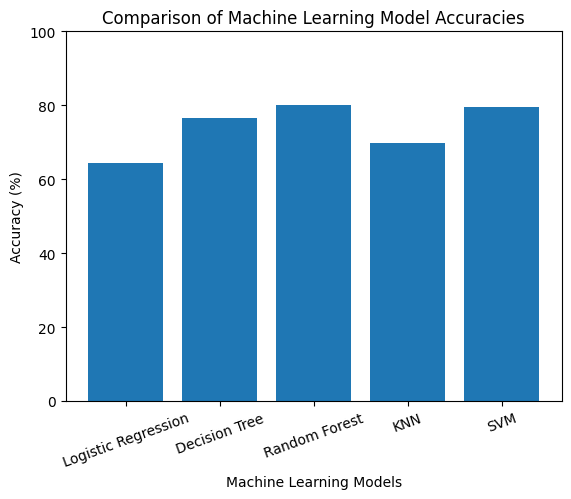

In [23]:
models = [
    "Logistic Regression",
    "Decision Tree",
    "Random Forest",
    "KNN",
    "SVM"
]

accuracies = [64.40, 76.60, 80.10, 69.80, 79.70]

# Create bar chart
plt.figure()
plt.bar(models, accuracies)
plt.xlabel("Machine Learning Models")
plt.ylabel("Accuracy (%)")
plt.title("Comparison of Machine Learning Model Accuracies")
plt.ylim(0, 100)
plt.xticks(rotation=20)
plt.show()

## Thank you..pld upvote!!!!